# Using Scikit-Learn Linear Regression ML Model

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

# Success
print('Using Scikit-Learn version', sklearn.__version__)

Using Scikit-Learn version 0.18.1


In [2]:
# Load the Data
data = pd.read_csv('data/reg1_data.csv')
targets = data['Target']
features = data.drop('Target', axis = 1)

data.head()

,1,2,3,4,5,6,7,8,9,10,Target
0,-0.502817,0.251484,-0.978830,-2.288620,-0.517519,0.181338,-0.439190,-0.960504,2.412454,-0.793117,109.005731
1,0.468385,0.022960,0.645055,-0.852586,-0.532490,-0.657951,1.011842,-0.667713,1.735879,1.681922,297.620919
2,0.286344,1.301846,1.020173,0.689818,-0.110541,1.536377,-0.692050,-1.045253,0.608844,1.211145,317.417212
3,-0.660056,1.742669,1.374964,0.284280,0.895260,-1.968625,-1.332212,0.498690,0.175819,1.047972,23.647337
4,0.625231,1.543015,-1.374951,-0.739563,-0.353994,-2.223403,-0.643618,-1.104383,-1.602058,0.052165,-425.638746


In [3]:
# Number of Features Classes
num_features = features.shape[1]
# Number of Target Classes 
num_targets = 1 

print('Number of feature classes:', num_features)
print('Number of target classes:', num_targets)

Number of feature classes: 10
Number of target classes: 1


In [4]:
data.describe()

,1,2,3,4,5,6,7,8,9,10,Target
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.091985,0.151920,-0.100582,-0.016703,-0.232290,-0.112952,0.047519,-0.033368,0.031245,-0.095370,65.817687
std,0.988034,0.902414,0.968545,1.082822,1.008614,1.038523,0.909011,0.865651,1.030341,1.050656,230.061197
min,-2.659172,-3.046143,-2.772593,-2.369587,-2.582797,-2.223403,-2.255564,-2.364174,-2.834555,-2.739677,-580.286988
25%,-0.682161,-0.359271,-0.840113,-0.742095,-0.904785,-0.880886,-0.651297,-0.682184,-0.582309,-0.793497,-77.119139
50%,-0.201977,0.042377,-0.039419,-0.082423,-0.391050,-0.193920,0.100924,-0.033249,0.121401,-0.153184,73.779970
75%,0.415777,0.706849,0.597932,0.689971,0.444220,0.432408,0.776522,0.593272,0.625741,0.560587,222.253436
max,2.696224,2.380745,1.929532,2.594425,2.011257,2.759355,2.303917,2.116791,2.412454,2.256723,696.232473


## Checking Out the Dataset

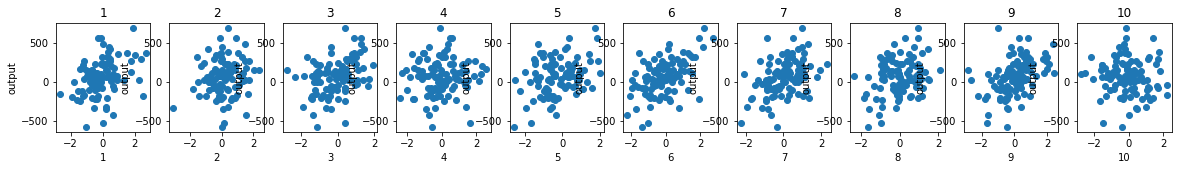

In [5]:
# Plotting Scatterplot of Target w.r.t. Each Feature Variable
plt.figure(figsize=(20, 2))
for i, col in enumerate(features.columns):
  plt.subplot(1, 10, i+1)
  plt.plot(data[col], targets, 'o')
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel('output')


## Splitting the Dataset into Training and Testing Sets

In [6]:
# Split into Training and Testing Sets
from sklearn.model_selection import train_test_split

features_train, features_test, targets_train, targets_test = train_test_split( \
                        features, targets, test_size=0.20, random_state=12)

print('Number of training datapoints:', features_train.shape[0])
print('Number of testing datapoints:', features_test.shape[0])

Number of training datapoints: 80
Number of testing datapoints: 20


## Building the Machine Learning Models

### Linear Regression

In [7]:
# ML Linear Regression using Scikit-Learn
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(features_train, targets_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
print("Linear Regression R-Squared Score on Training Data:", linreg.score(features_train,targets_train))
print("Linear Regression R-Squared Score on Testing Data:", linreg.score(features_test,targets_test))
print("Intercept / Bias Value:", linreg.intercept_)
print('Number of Weight Coefficients:', len(linreg.coef_))
pd.DataFrame(list(zip(features.columns, linreg.coef_)), \
             columns = ['Feature Name', 'Weight Coefficient'])


Linear Regression R-Squared Score on Training Data: 0.999771097426
Linear Regression R-Squared Score on Testing Data: 0.999743532398
Intercept / Bias Value: 100.280475935
Number of Weight Coefficients: 10


,Feature Name,Linear Coefficient
0,1,77.680239
1,2,34.180250
2,3,70.435453
3,4,1.930927
4,5,82.404002
5,6,97.114413
6,7,89.521548
7,8,60.877807
8,9,98.705144
9,10,3.061605


### Support Vector Machine Regressor (SVR)

In [9]:
# ML SVM Regressor
from sklearn.svm import SVR

svr = SVR(kernel='linear')
svr.fit(features_train, targets_train)

print("SVR R-Squared Score on Training Data:", svr.score(features_train,targets_train))
print("SVR R-Squared Score on Testing Data:", svr.score(features_test,targets_test))


SVR R-Squared Score on Training Data: 0.477028977496
SVR R-Squared Score on Testing Data: 0.463078164174


### Random Forest Ensemble Regressor

In [10]:
# ML Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(features_train, targets_train)

print("Random Forest Regressor R-Squared Score on Training Data:", rfr.score(features_train,targets_train))
print("Random Forest Regressor R-Squared Score on Testing Data:", rfr.score(features_test,targets_test))


Random Forest Regressor R-Squared Score on Training Data: 0.920869302926
Random Forest Regressor R-Squared Score on Testing Data: 0.543542579508


# Using Single Dense Layer Neural Network for Linear Regression

- No Hidden Layer
- No Activation Function
- Predictions is therefore Y = W.X + b

In [11]:
# Import TF Library
import tensorflow as tf
print("Using Google TensorFlow version", tf.__version__)

Using Google TensorFlow version 1.0.0


In [12]:
# Build NN Model
def neural_network(learning_rate, epochs, features_train, targets_train, \
                   features_test, targets_test, size_in, size_out):

    # Start TensorFlow Graph
    tf.reset_default_graph()
    sess = tf.Session()
       
    # Inputs
    with tf.name_scope("Inputs"):
        x = tf.placeholder(tf.float32, shape=[None, size_in], name="features")
    
    # Targets    
    with tf.name_scope("Targets"):
        y = tf.placeholder(tf.float32, shape=[None, size_out], name="targets")

    # Single-Layer Dense Neural Network
    with tf.name_scope("Dense"):
        w = tf.Variable(tf.ones([size_in, size_out]), name="weights")
        b = tf.Variable(tf.constant(1.0, shape=[size_out]), name="biases")
        y_ = tf.add(tf.matmul(x, w), b)
        tf.summary.histogram("Weights", w)
        tf.summary.histogram("Biases", b)
        tf.summary.histogram("Predictions", y_)

    # Mean Squared Error (MSE) Cost Function
    with tf.name_scope("MSE-Cost"):
        mse = tf.reduce_mean(tf.square(y_ - y), name="MSE")
        tf.summary.scalar("Mean_Squared_Error", mse)

    # Gradient Descent Optimizer
    with tf.name_scope("Training"):
        train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(mse)

    # R-Squared Accuracy Score
    with tf.name_scope("R-Squared"):
        model_error = tf.reduce_sum(tf.square(tf.subtract(y, y_)))
        average_error = tf.reduce_sum(tf.square(tf.subtract(y, tf.reduce_mean(y))))
        # R-Squared Value
        accuracy = tf.subtract(1.0, (tf.div(model_error, average_error)))
        tf.summary.scalar("R_Squared_Value", accuracy)

    # Initialization
    summ = tf.summary.merge_all()  
    saver = tf.train.Saver()
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter('./logs/1/train')
    writer.add_graph(sess.graph)
    
    # Training Set
    for i in range(epochs):
        if i % 10 == 0:
            [train_accuracy, s] = sess.run([accuracy, summ], \
                        feed_dict={x: features_train, y: targets_train})
            writer.add_summary(s, i)
        sess.run(train_step, feed_dict={x: features_train, y: targets_train})
    
    # Results
    slope = sess.run(w)
    intercept = sess.run(b)
    pred_train = sess.run(y_, feed_dict={x: features_train, y: targets_train})
    pred_test = sess.run(y_, feed_dict={x: features_test, y: targets_test})

    
    return (slope, intercept, pred_train, pred_test)

print('Build successful!')

Build successful!


In [13]:
# Setting up Hyperparameters
learning_rate = 0.01
epochs = 2000

print('Using {} learning rate on {} training epochs'.format(learning_rate, epochs))

Using 0.01 learning rate on 2000 training epochs


In [14]:
# Convert Targets shape from (None,) to (None, 1) to feed into TensorFlow Graph
targets_train = np.reshape(targets_train, (-1, 1))
targets_test = np.reshape(targets_test, (-1, 1))


/home/andridsasmita/anaconda3/envs/tf3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


In [15]:
# Run Training
(slope, intercept, pred_train, pred_test) = neural_network(learning_rate, epochs, \
        features_train, targets_train, features_test, targets_test, num_features, num_targets)


## Evaluating the Model Performance

### Plotting Results

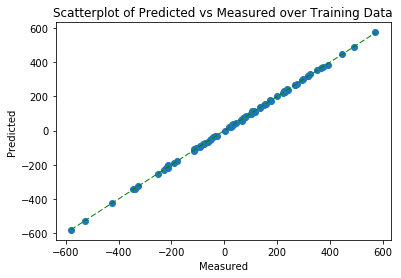

In [16]:
# Plot Prediction Over Training Data
fig, ax = plt.subplots()
ax.scatter(targets_train, pred_train)
ax.plot([targets_train.min(), targets_train.max()], [targets_train.min(), targets_train.max()], 'g--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title("Scatterplot of Predicted vs Measured over Training Data")
plt.show()


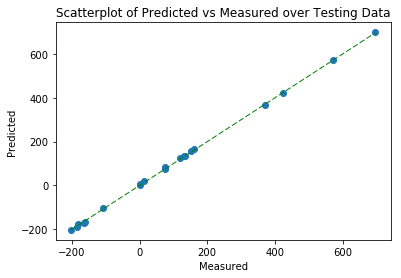

In [17]:
# Plot Prediction Over Training Data
fig, ax = plt.subplots()
ax.scatter(targets_test, pred_test)
ax.plot([targets_test.min(), targets_test.max()], [targets_test.min(), targets_test.max()], 'g--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title("Scatterplot of Predicted vs Measured over Testing Data")
plt.show()


In [18]:
from sklearn.metrics import r2_score
print("TF R-Squared Score on Training Data:", r2_score(targets_train, pred_train))
print("TF R-Squared Score on Testing Data:", r2_score(targets_test, pred_test))
print("Intercept / Bias Value:", intercept)
print('Number of Weight Coefficients:', len(slope))
pd.DataFrame(list(zip(features.columns, slope)), \
             columns = ['Feature Name', 'Weight Coefficient'])


TF R-Squared Score on Training Data: 0.999771097887
TF R-Squared Score on Testing Data: 0.999743578195
Intercept / Bias Value: [ 100.28016663]
Number of Weight Coefficients: 10


,Feature Name,Linear Coefficient
0,1,[77.6799]
1,2,[34.1804]
2,3,[70.4357]
3,4,[1.93082]
4,5,[82.4038]
5,6,[97.1145]
6,7,[89.5213]
7,8,[60.8776]
8,9,[98.7049]
9,10,[3.0616]
